In [1]:
%matplotlib inline
import warnings
from numpy import *
from numpy.linalg import norm
from matplotlib.pyplot import *
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
rcParams.update(newparams)
warnings.filterwarnings('ignore')

### Oppgave 3

In [2]:
def ode_solver(f, x0, xend, y0, h, method):
    # Initialization
    y_num = array([y0])    # Array for the solution y 
    x_num = array([x0])    # Array for the x-values

    xn = x0                # Running values for x and y
    yn = y0 

    # Main loop
    while xn < xend - 1.e-10:            # Buffer for truncation errors        
        xn, yn = method(f, xn, yn, h)    # Do one step by the method of choice
        
        # Extend the arrays for x and y
        y_num = concatenate((y_num, array([yn])))
        x_num = append(x_num, xn)
        
    return x_num, y_num

In [3]:
def euler(f, x, y, h):
    y_next = y + h*f(x, y)
    x_next = x + h
    return x_next, y_next

In [15]:
def heun(f, x, y, h):
    # One step of Heun's method
    k1 = f(x, y)
    k2 = f(x+h, y+h*k1)
    y_next = y + 0.5*h*(k1+k2)
    x_next = x + h
    return x_next, y_next

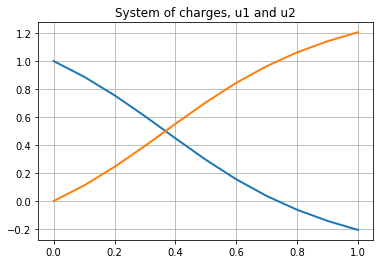

In [16]:
def f(x, y):
    dy = array([y[1],
            -1 / (y[0] - y[2])**2,
            y[3],
            1 / (y[0] - y[2])**2])
    return dy


x0, xend = 0, 1
h = 0.1
y0 = array([0, 1, 1, 0])

x_num, y_num = ode_solver(f, x0, xend, y0, h, method=heun)
u_num = y_num[:,(1, 3)]
plot(x_num, u_num);
title("System of charges, u1 and u2");

### Oppgave 4

In [17]:
def RK4(f, x, y, h):
    k1 = f(x, y)
    k2 = f(x + h/2, y + h/2 * k1)
    k3 = f(x + h/2, y + h/2 * k2)
    k4 = f(x + h, y + h * k3)
    x_next = x + h
    y_next = y + h/6 * (k1 + 2*k2 + 2*k3 + k4)
    return x_next, y_next

In [18]:
def lotka_volterra(x, y):
    alpha, beta, delta, gamma = 2, 1, 0.5, 1
    dy = array([alpha*y[0]-beta*y[0]*y[1], 
                delta*y[0]*y[1]-gamma*y[1]])
    return dy

In [19]:
def convergence_table_ode(f, f_exact, x0, xend, y0, h, n, method):
    """
    Creates a list of tuples of the form (step, y_num, error, order, constant).
        f       : Multivariable function describing first derivative
        f_exact : Function for evaluating exact endpoint value.
        x0      : Initial x value
        xend    : Endpoint value for x
        y0      : Initial y value
        h       : Initial step size
        n       : Number of iterations
        method  : Method for solving ODE
    """
    # Initial setup
    exact = f_exact(xend) if callable(f_exact) else f_exact
    steps = []
    numerical = []
    errors = []
    orders = [nan]
    constants = [nan]

    for _ in range(n):
        x_num, y_num = ode_solver(f, x0, xend, y0, h, method)
        y_last = y_num[-1]
        error = abs(exact - y_last)
        steps.append(h)
        numerical.append(y_last)
        errors.append(error)
        h /= 2
        
    # Calculate p and c
    for e_0, e_1, h_0, h_1 in zip(errors, errors[1:], steps, steps[1:]):
        p = log(e_1/e_0)/log(h_1/h_0)
        c = e_1/h_1**p
        orders.append(p)
        constants.append(c)
    
    return list(zip(steps, numerical, errors, orders, constants))

In [20]:
def f(x, y): return -2*x*y
def f_exact(x): return exp(-x**2)

x0, xend = 0, 1
y0 = 1
h, n = 1, 10

results = convergence_table_ode(f, f_exact, x0, xend, y0, h, n, RK4)
steps = [data[0] for data in results]
errors = [data[2] for data in results]

# Printing
header = "|{:^12}|{:^12}|{:^12}|{:^12}|{:^12}|".format("Step size", "Numerical", "Error", "Order", 'Constant')
print(header)
print('='*len(header))
for data in results:
    print("|{:^12.4e}|{:^12.4e}|{:^12.4e}|{:^12.4e}|{:^12.4e}|".format(*data))

| Step size  | Numerical  |   Error    |   Order    |  Constant  |
| 1.0000e+00 | 3.3333e-01 | 3.4546e-02 |    nan     |    nan     |
| 5.0000e-01 | 3.6803e-01 | 1.5238e-04 | 7.8247e+00 | 3.4546e-02 |
| 2.5000e-01 | 3.6793e-01 | 5.5054e-05 | 1.4687e+00 | 4.2175e-04 |
| 1.2500e-01 | 3.6788e-01 | 3.9268e-06 | 3.8094e+00 | 1.0822e-02 |
| 6.2500e-02 | 3.6788e-01 | 2.5007e-07 | 3.9729e+00 | 1.5204e-02 |
| 3.1250e-02 | 3.6788e-01 | 1.5647e-08 | 3.9984e+00 | 1.6315e-02 |
| 1.5625e-02 | 3.6788e-01 | 9.7677e-10 | 4.0017e+00 | 1.6506e-02 |
| 7.8125e-03 | 3.6788e-01 | 6.0987e-11 | 4.0014e+00 | 1.6486e-02 |
| 3.9062e-03 | 3.6788e-01 | 3.8091e-12 | 4.0010e+00 | 1.6448e-02 |
| 1.9531e-03 | 3.6788e-01 | 2.3814e-13 | 3.9996e+00 | 1.6320e-02 |


In [1]:
x0, xend = 0, 10
y0 = array([2, 0.5])

for i, method in enumerate([RK4, heun]):
    for j, h in enumerate([0.1, 0.5], 1):
        x_num, y_num = ode_solver(lotka_volterra, x0, xend, y0, h, method=method)
        
        subplot(2, 2, 2*i + j)
        plot(x_num, y_num, linewidth=1.0)
        title(f"Lotka-Voltera - {method.__name__} (h={h})")

tight_layout()

NameError: name 'array' is not defined